In [85]:
import imageio
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [322]:
file = open("filter.txt", "r")

matrix_filter = []

for row in file:
    values = row.split()
    matrix_filter.append(values)
    
file.close()

for row in range(len(matrix_filter)):
    for column in range(len(matrix_filter[0])):
        matrix_filter[row][column] = float(matrix_filter[row][column])


In [323]:
matrix_filter = np.array(matrix_filter)
matrix_filter

array([[ 1.,  0., -1.],
       [ 2.,  0., -2.],
       [ 1.,  0., -1.]])

## Funções para plotar

In [324]:
# Plota 1 imagem

def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');
    
# Plota as 2 imagens
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray');

## Carrega a imagem e aplica a cor cinza

(224, 224)


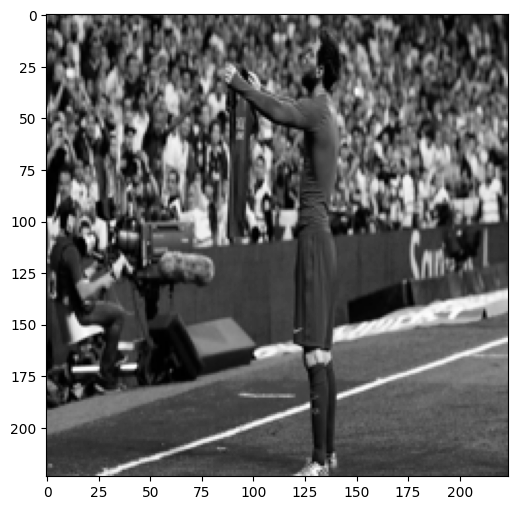

In [325]:
img = Image.open('messi.webp')
img = ImageOps.grayscale(img)
img = img.resize(size=(224, 224))
plot_image(img=img)
print(np.array(img).shape)

## Calcula o tamanho da imagem depois da aplicação do filtro

In [326]:
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    print("kernel: ", kernel_size)
    
    for i in range(img_size):
        added = i + kernel_size
  
        if added <= img_size:
            num_pixels += 1
            
    return num_pixels

In [327]:
calculate_target_size(img_size=228, kernel_size=5)

kernel:  5


224

## Função para aplicar a convolução

In [328]:
def convolve(img: np.array, kernel: np.array, extension = False) -> np.array:
    
    kernel_size = 0

    tgt_size_r = calculate_target_size(
        img_size=img.shape[0],
        kernel_size=len(kernel)
    )
    
    tgt_size_c = calculate_target_size(
        img_size=img.shape[1],
        kernel_size=len(kernel[0])
    )

    k = kernel.shape[0]
    l = kernel.shape[1]
    
    convolved_img = 0
    
    if extension:
        range_img_r = img.shape[0] - (kernel.shape[0]-1)
        range_img_c = img.shape[1] - (kernel.shape[1]-1)
        
        convolved_img = np.zeros(shape=(range_img_r, range_img_c))
        
        for i in range(range_img_r):

            for j in range(range_img_c):

                mat = img[i:i+k, j:j+l]

                convolved_img[i, j] = np.sum(np.multiply(mat, kernel))

    else:
        range_img_r = tgt_size_r
        range_img_c = tgt_size_c
        
        convolved_img = np.zeros(shape=(tgt_size_r, tgt_size_c))

        for i in range(range_img_r):

            for j in range(range_img_c):

                mat = img[i:i+k, j:j+l]

                convolved_img[i, j] = np.sum(np.multiply(mat, kernel))

            
    return convolved_img

In [329]:
img_result = convolve(img=np.array(img), kernel=matrix_filter)
print(img_result.shape)

max_val=0
for i in range(0, img_result.shape[0]):
    for j in range(0, img_result.shape[1]):
        img_result[i][j] = abs(img_result[i][j])
        if(max_val<img_result[i][j]):
            max_val = img_result[i][j]
            
for i in range(0, img_result.shape[0]):
    for j in range(0, img_result.shape[1]):
        img_result[i][j] /= max_val
        img_result[i][j] *= 255;

kernel:  3
kernel:  3
(222, 222)


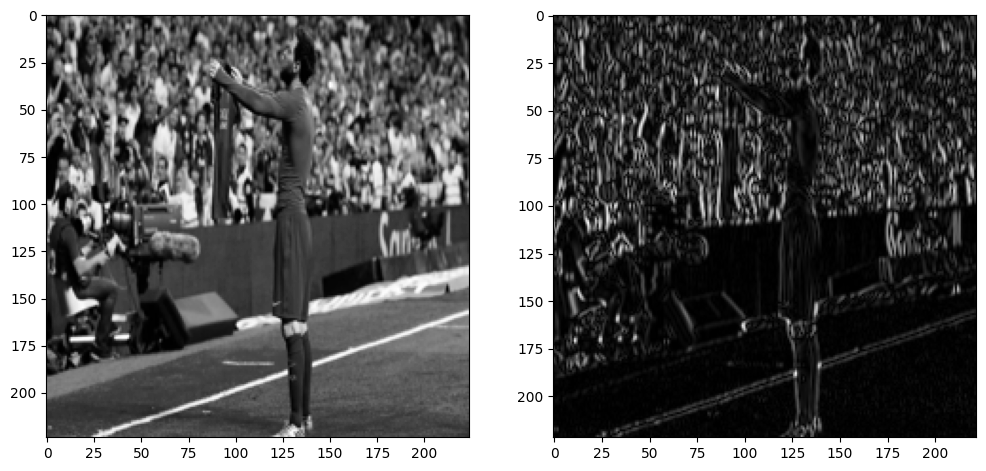

In [330]:
plot_two_images(
    img1=img, 
    img2=img_result
)

## Corrigindo o problema do padding

In [331]:
def get_padding_width_per_side(kernel_size: int) -> int:

    return kernel_size // 2

In [332]:
def add_padding_to_image(img: np.array, padding_width_r: int, padding_width_c: int) -> np.array:
    
    img_with_padding = np.zeros(shape=(
        img.shape[0] + padding_width_r * 2,  
        img.shape[1] + padding_width_c * 2
    ))
    
    img_with_padding[padding_width_r:-padding_width_r, padding_width_c:-padding_width_c] = img
    
    print("imgg: ", img_with_padding.shape[0], img_with_padding.shape[1])
    
    return img_with_padding

In [333]:
matrix_filter.shape[0]

3

In [334]:
matrix_filter.shape[1]

3

In [335]:
pad_3x3_r = get_padding_width_per_side(kernel_size=matrix_filter.shape[0])
pad_3x3_c = get_padding_width_per_side(kernel_size=matrix_filter.shape[1])

In [336]:
print(pad_3x3_r,pad_3x3_c)

1 1


In [337]:
img_with_padding_result = add_padding_to_image(
    img=np.array(img), 
    padding_width_r=pad_3x3_r,
    padding_width_c=pad_3x3_c
)

imgg:  226 226


In [338]:
img_with_padding_result.shape[0]

226

In [339]:
img_with_padding_result.shape[1]

226

kernel:  3
kernel:  3
(224, 224)


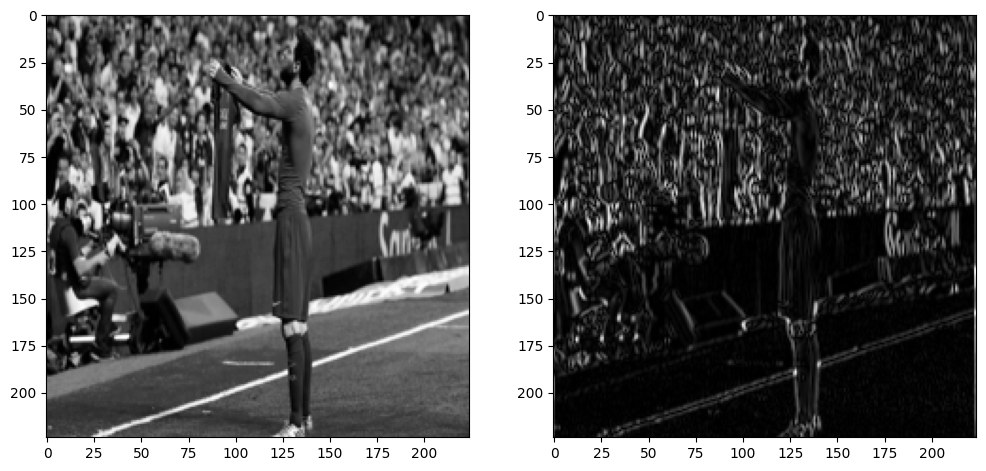

In [340]:
img_padded_result = convolve(img=img_with_padding_result, kernel=matrix_filter, extension=True)
print(img_padded_result.shape)

max_val=0
for i in range(0, img_padded_result.shape[0]):
    for j in range(0, img_padded_result.shape[1]):
        img_padded_result[i][j] = abs(img_padded_result[i][j])
        if(max_val<img_padded_result[i][j]):
            max_val = img_padded_result[i][j]
            
for i in range(0, img_padded_result.shape[0]):
    for j in range(0, img_padded_result.shape[1]):
        img_padded_result[i][j] /= max_val
        img_padded_result[i][j] *= 255;

plot_two_images(
    img1=img, 
    img2=img_padded_result
)